This notebook is used to get a feel for possible activation fiunctions as well as the time encoding.

In [1]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

sys.path.append(parent_dir)

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import torch.nn as nn


/home/thahit/anaconda3/envs/WWcopy/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:230.)
  if sys.path[0] == "":
/home/thahit/anaconda3/envs/WWcopy/lib/python3.7/site-packages/torch/nn/functional.py:1956: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


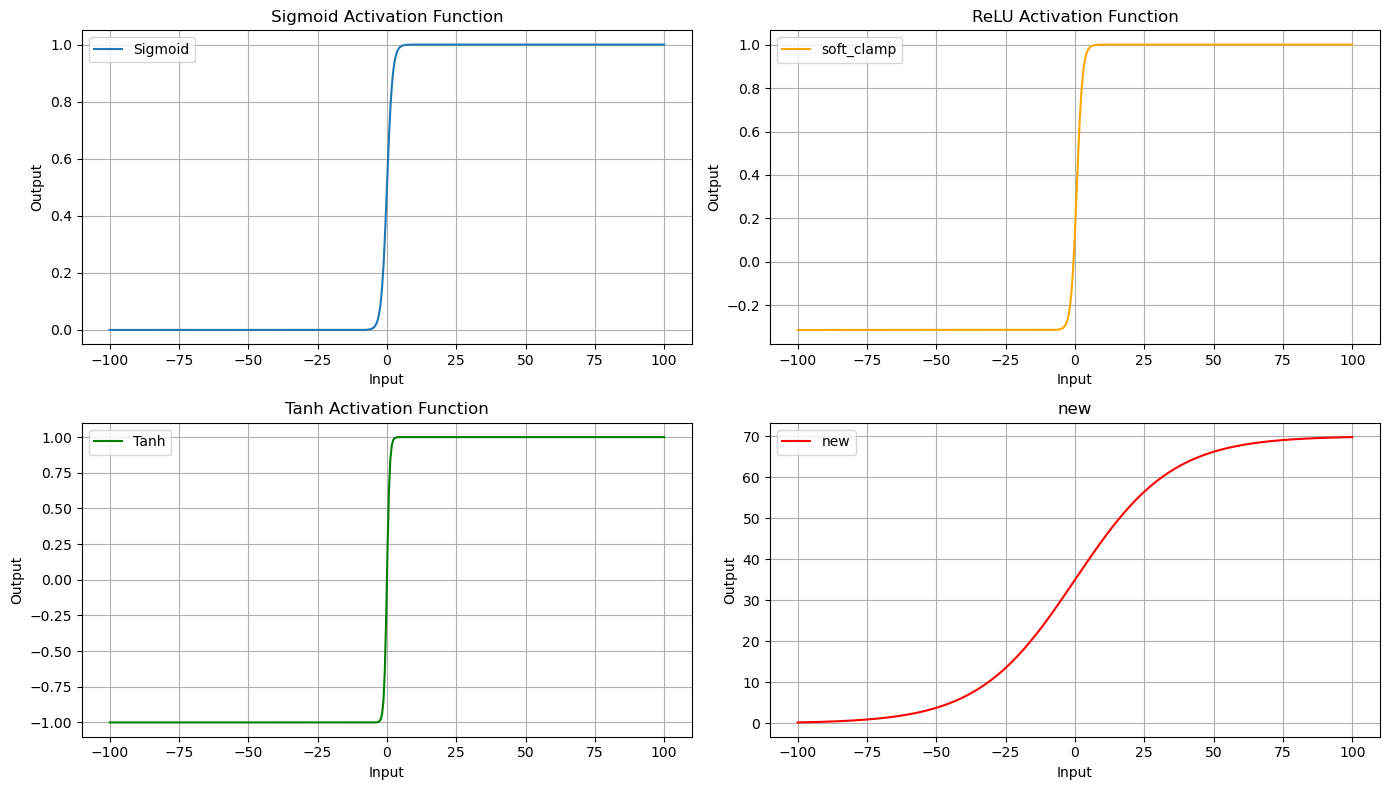

In [2]:
borders = 100
# Define a range of input values
x = np.linspace(-borders, borders, 400)

# Compute activation functions
sigmoid_x = 1 / (1 + np.exp(-x))
relu_x = np.maximum(0, x)
tanh_x = np.tanh(x)

# For softmax, we need a 2D tensor (batch_size, num_classes)
# We can compute softmax for a few sample logits
logits = torch.tensor([x], dtype=torch.float32)
softmax_x = F.softmax(logits, dim=1).detach().numpy().flatten()

def new2(x, a=0, b=1, scale=0.1):

    x= torch.as_tensor(x)
    x = nn.functional.softplus(x)
    x = -x +1
    x = nn.functional.softplus(x)
    x = -x +1
    return x 

def smoothclamp(x, a=0, b=1, scale=0.1):
    """
    Apply a soft clamping to ensure values are within [b, a] using tanh function.
    Args:
        x (torch.Tensor): Input tensor.
        a (float): Upper bound.
        b (float): Lower bound.
        scale (float): Scaling factor for tanh function.
    Returns:
        torch.Tensor: Tensor with values clamped within [b, a].
    """
    x = nn.functional.softplus(x)
    x = -x +1
    x = nn.functional.softplus(x)
    x = -x +1
    return x 

def new(x):
    x= torch.as_tensor(x)
    x = nn.functional.tanh(x/35 )+1
    x = x*35
    return x
new_space = [new(example) for example in x]
# Plot activation functions
plt.figure(figsize=(14, 8))

# Sigmoid function
plt.subplot(2, 2, 1)
plt.plot(x, sigmoid_x, label='Sigmoid')
plt.title('Sigmoid Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.legend()

# ReLU function
plt.subplot(2, 2, 2)
plt.plot(x, new2(x), label='soft_clamp', color='orange')
plt.title('ReLU Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.legend()

# Tanh function
plt.subplot(2, 2, 3)
plt.plot(x, tanh_x, label='Tanh', color='green')
plt.title('Tanh Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.legend()

# Softmax function (only a single value for demonstration)
plt.subplot(2, 2, 4)
plt.plot(x, new_space, label='new', color='red')
plt.title('new')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [3]:
new(.9)

tensor(35.8998)

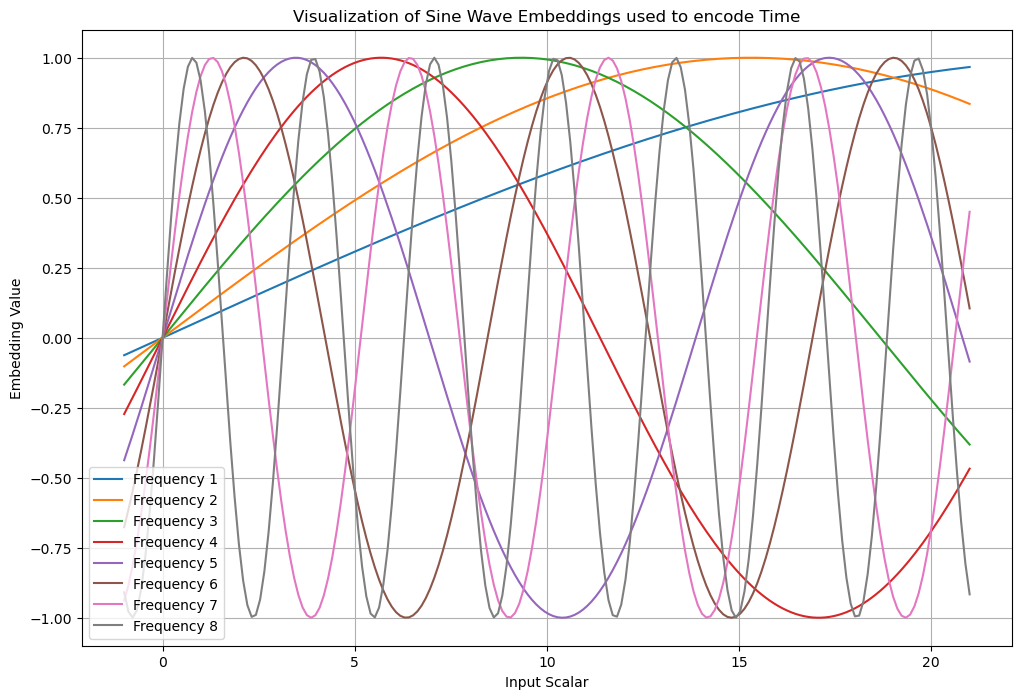

In [4]:
from simtrain.sim_models_new import SignWaveEmbedding


def plot_embeddings(model, x_range):
    """
    Visualize the sign wave embeddings over a range of input values.
    
    Args:
        model (LogSignWaveEmbedding): The embedding model.
        x_range (torch.Tensor): Input values for which embeddings are computed.
    """
    embeddings = model(x_range)
    num_frequencies = model.num_frequencies
    
    # Plot each frequency component
    plt.figure(figsize=(12, 8))
    
    for i in range(num_frequencies):
        plt.plot(x_range.numpy(), embeddings[:, i].detach().numpy(), label=f'Frequency {i+1}')
    
    plt.title('Visualization of Sine Wave Embeddings used to encode Time')
    plt.xlabel('Input Scalar')
    plt.ylabel('Embedding Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
def example_usage():
    num_frequencies = 16  # Number of different frequencies
    max_frequency = 10.0  # Maximum frequency value
    embedding_dim = num_frequencies * 2  # Sine and cosine for each frequency
    
    # Create the model
    model = SignWaveEmbedding(num_frequencies, max_frequency)
    
    # Define the range of input values
    x_range = torch.linspace(-1, 1+max_frequency*2, 200)  # Example input range
    x_range = x_range.unsqueeze(-1)
    # Plot embeddings
    plot_embeddings(model, x_range)

# Run example usage
example_usage()